# NETFLIX EDA: Rishika

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('netflix.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [205]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,actors
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"[Alan Marriott, Andrew Toth, Brian Dobson, ..."
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,[Jandino Asporaat]
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...","[Peter Cullen, Sumalee Montano, Frank Welker..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,"[Will Friedle, Darren Criss, Constance Zimme..."
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,"[Nesta Cooper, Kate Walsh, John Michael Higg..."


In [5]:
#cleaning the data
print(df.isnull().any())

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


In [6]:
#removing the null values
df['director'].dropna(inplace=True)
df['cast'].dropna(inplace=True)
df['country'].dropna(inplace=True)
df['date_added'].dropna(inplace=True)
df['rating'].dropna(inplace=True)

In [7]:
#Top directors
df['director'].value_counts().head()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
Name: director, dtype: int64

<AxesSubplot:xlabel='count', ylabel='director'>

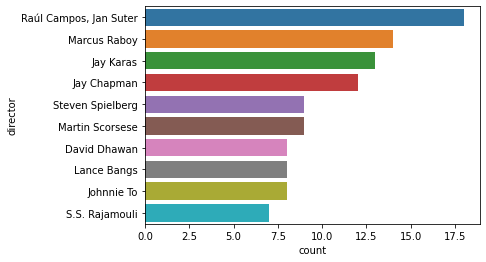

In [8]:
sns.countplot(y=df.director, order=df.director.value_counts().index[:10])

In [10]:
#Ratio of Tvshows and Movies:
df.groupby('type')['type'].value_counts()

type     type   
Movie    Movie      4265
TV Show  TV Show    1969
Name: type, dtype: int64

([<matplotlib.patches.Wedge at 0x2c3ff062280>,
 [Text(-0.6014719407703795, 0.9209948449724967, 'Movie'),
  Text(0.6014718545406157, -0.9209949012863603, 'TV Show')])

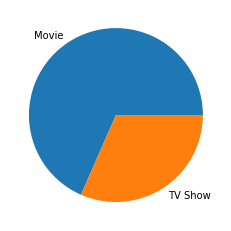

In [12]:
plt.pie(df.type.value_counts(), labels=df.type.value_counts().index)

In [48]:
#Most watched movie in each year:
df.groupby('release_year')['type'].value_counts()
#df.groupby('release_year')['release_year'].value_counts()

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2018          TV Show    417
2019          TV Show    443
              Movie      400
2020          TV Show     19
              Movie        6
Name: type, Length: 115, dtype: int64

In [263]:
movie_count= df[df['type']=='Movie']
movie_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,actors
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"[Alan Marriott, Andrew Toth, Brian Dobson, ..."
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,[Jandino Asporaat]
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,"[Nesta Cooper, Kate Walsh, John Michael Higg..."
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...","[Antonio Banderas, Dylan McDermott, Melanie ..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,[Fabrizio Copano]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,NaN
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,"[Rene Russo, Oliver Platt, Johnny Simmons, ..."
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,[Allen Iverson]
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...,[Jeremy Scott]


In [51]:
tv_count= df[df['type']=='TV Show']

In [267]:
a=movie_count['release_year'].value_counts().nlargest(n=10)
b= tv_count['release_year'].value_counts().nlargest(n=10)

TypeError: 'str' object is not callable

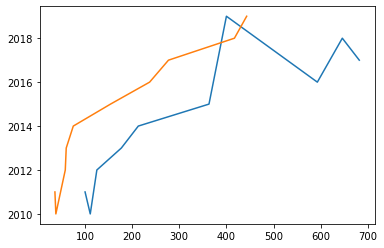

In [271]:
plt.plot(a, a.index, b, b.index)
plt.xlabel('count')

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='release_year'>

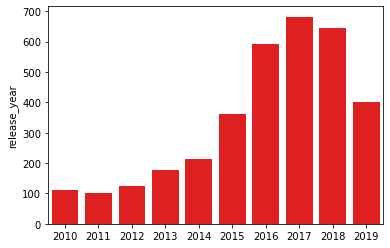

In [274]:
sns.barplot(a.index, a, color='red')


<BarContainer object of 5 artists>

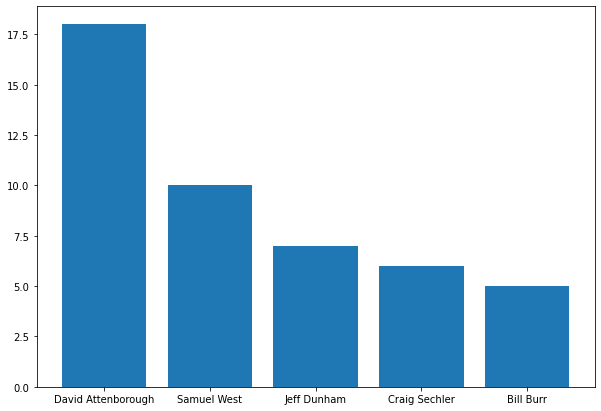

In [119]:
#top movie actors:
x=df['cast'].value_counts().head()
plt.figure(figsize=(10,7))
plt.bar( x.index, x)

In [151]:
#avg duration of movies:movie_count.info()

In [150]:
time=movie_count['duration'].apply(lambda x: x.split(' ')[0])
time=time.astype(float)
time.mean()

99.10082063305978

C:\Users\ypanw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

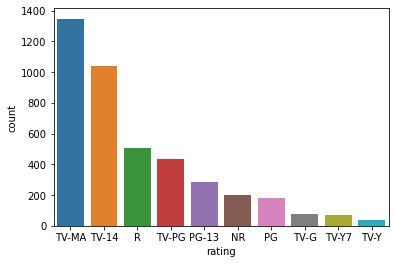

In [179]:
#most watched movies acc to rating:
sns.countplot(movie_count.rating, order=movie_count.rating.value_counts().index[:10])

In [1]:
#countries where the max no of movies were watched
a=movie_count['country'].str.rsplit(',')
a.value_counts()

NameError: name 'movie_count' is not defined